#Prediction of the Effectiveness of a Marketing Campaign 

The objective of this project is to predict the success of a telemarketing campaign of a Portuguese bank. The marketing campaign is a phone call one. Essentially, an operator makes a phone to a client and then the operator asks to him/her if would like to subscribe to a product (bank term deposit). The answer is a binary option (yes or no).

As a methodology, we use Ensemble of Decision Tree methods. We choice a simple Decision Tree (CART model), as a baseline model and other three Ensembles Decision Trees algorithms for trying to beating the performance of the baseline. Random Forest, Extremely Random Forest and Extreme Gradient Boosting were the algorithms chosen.

If we can predict this event, we will save money and man-hours effort just calling to the ones with at least an acceptable/high probability of subscription. Also we can identify the most correlated features with this event, and using the knowledge for improving operational efficiency. Therefeore, the business impact is evident.

###Content:
###1. Getting started
###2. Data exploration
###3. Data analysis
###4. Preprocesing and modeling
###5. Results

# 1. Getting started

In [0]:
#Libraries

#Data Wrangling 
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

#Preprocessing and ploting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz

#Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

#IPython notebooks
from IPython.display import Image 
from IPython.display import display
from IPython.display import HTML

In [0]:
#Storing the data file
url_dataset = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/dataset_bankmarketing.csv"

In [0]:
#Reading the dataset and storing in a dataframe
dataset = pd.read_csv(url_dataset, sep=",")

In [0]:
#Exploring the dataset
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#1.1 Explanation of the features

1. age (no need of further explanation)

2. job: type of job (example: admin, blue-collar, entrepreneur, housemaid, management, etc)

3. marital: marital status (example: divorce, married, single)

4. education (example: high.school, university degree)

5. default: has credit in default? (answer: yes or no)

6. balance: average yearly balance (in euros)

7. housing: has housing loan? (answer: yes or no)

8. loan: has personal loan? (answer: yes or no)

9. contact: contact communication type (example: cellular,telephone, etc)

10. month: last contact month of year (example: jan, feb, mar, ..., nov, dec)

11. day_of_week: last contact day of the week (example: mon, tue, wed, thu, fri)

12. duration: last contact duration, in seconds (numeric).

13. campaign: number of contacts performed during this campaign and for this client (numeric)

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)

15. previous: number of contacts performed before this campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing campaign (example: failure, nonexistent, success)

17. y: target value (yes or no)

# 2. Data Exploration

In [0]:
#Descriptive stats
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
#Displaying info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# 3. Data Analysis

#3.1 Target Feature

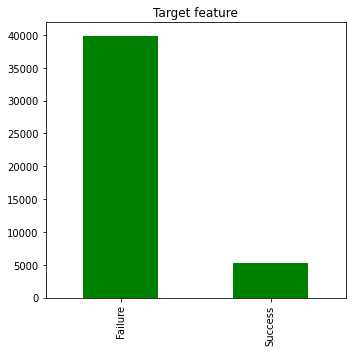

In [0]:
#Creating a figure
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))

#Plotting the target feature
dataset["y"].replace(to_replace = {"yes":"Success", "no":"Failure"}, value = None , inplace = True)
dataset["y"].value_counts().plot(kind = "bar", color = "green", title = "Target feature")

#Managing the aesthetic layout
fig.tight_layout()

#3.1 Bank Client Data

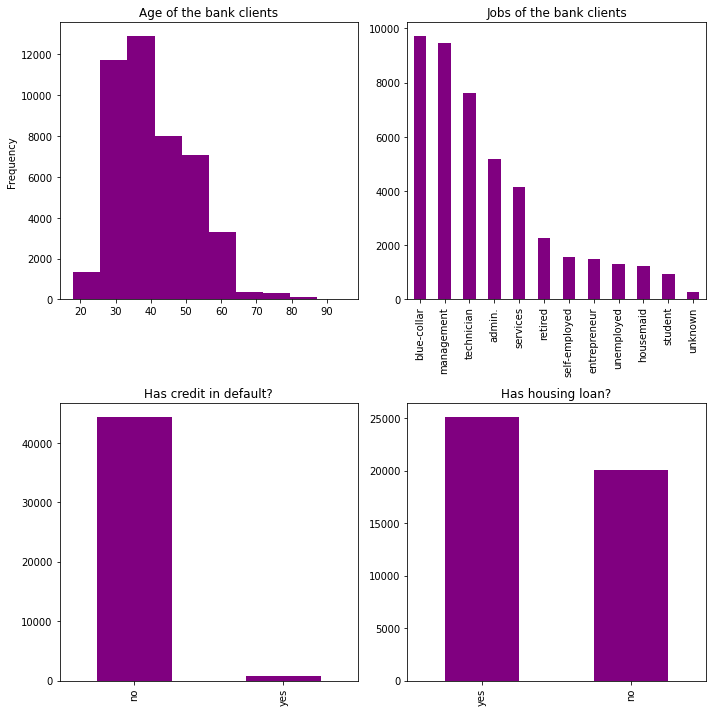

In [0]:
#Creating a figure
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

#Ploting the features age, job, default and housing
dataset["age"].plot(kind = "hist", color = "purple", ax = axes[0,0], title = "Age of the bank clients" )
dataset["job"].value_counts().plot(kind = "bar", color = "purple", ax = axes[0,1], title = "Jobs of the bank clients" )
dataset["default"].value_counts().plot(kind = "bar", color = "purple", ax = axes[1,0], title = "Has credit in default?")
dataset["housing"].value_counts().plot(kind = "bar", color = "purple", ax = axes[1,1], title = "Has housing loan?")

#Managing the aesthetic layout
fig.tight_layout()

#3.2 Data Related with the Last Contacts

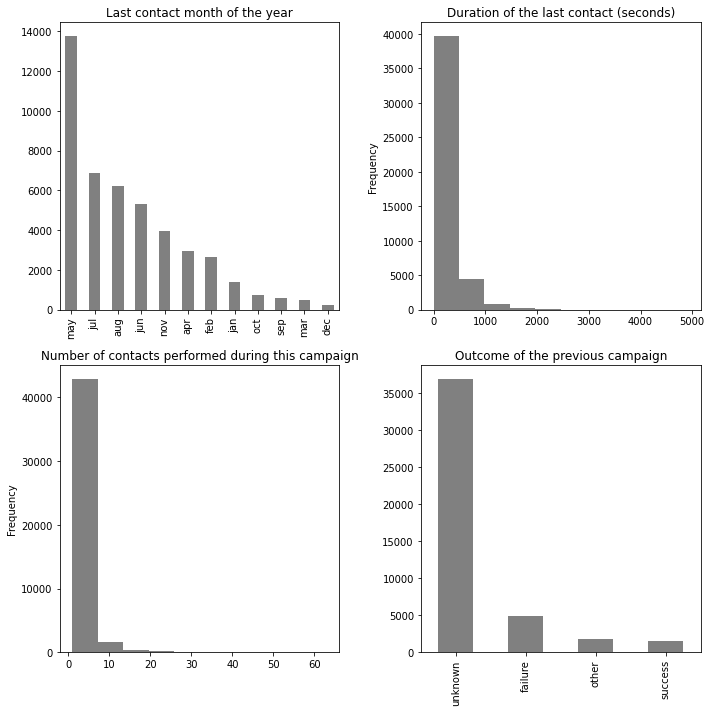

In [0]:
#Creating a figure
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

#Plotting the features month, duration, campaign and poutcome
dataset["month"].value_counts().plot(kind = "bar", color = "gray", ax = axes[0,0], title = "Last contact month of the year" )
dataset["duration"].plot(kind = "hist", color = "gray", ax = axes[0,1], title = "Duration of the last contact (seconds)" )
dataset["campaign"].plot(kind = "hist", color = "gray", ax = axes[1,0], title = "Number of contacts performed during this campaign" )
dataset["poutcome"].value_counts().plot(kind = "bar", color = "gray", ax = axes[1,1], title = "Outcome of the previous campaign")

#Managing the aesthetic layout
fig.tight_layout()

# 4. Preprocessing and Modeling

In [0]:
#Separation of X and y
y = dataset["y"]
X = dataset[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]]

In [0]:
#Splitting the dasatet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y , random_state = 0)

In [0]:
#Label Encoding
label_encoder = LabelEncoder()

#Performing Label Encoding
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform (y_test)

#Performing One-Hot-Encoding
X_train_processing = pd.get_dummies(X_train[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]])
X_test_processing = pd.get_dummies(X_test[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]])

#4.1 Decission Tree

In [0]:
#Using cost-sensitive Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0, class_weight="balanced")

#Fitting the Tree
tree.fit(X_train_processing, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#4.2 Random Forest

In [0]:
#Using cost-sensitive Random Forest
random_forest = RandomForestClassifier(max_depth=4, random_state=0, class_weight="balanced")

#Fitting Random Forest
random_forest.fit(X_train_processing, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#4.3 Extremely Random Forest

In [0]:
#Using cost-sensistive Extremely Random Forest
extremely_random_forest = ExtraTreesClassifier(random_state=0, max_depth=4, class_weight="balanced")

#Fitting Extremely Random Forest
extremely_random_forest.fit(X_train_processing, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=4, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

#4.4 Extreme Gradient Boosting

In [0]:
#Using a XGBoost model
XGBoost = GradientBoostingClassifier(max_depth=4, random_state=0)

#Fitting XGBoost
XGBoost.fit(X_train_processing, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# 5. Results

#  5.1 Visualizing the Ensemble Trees

#5.1.1 Decision Tree

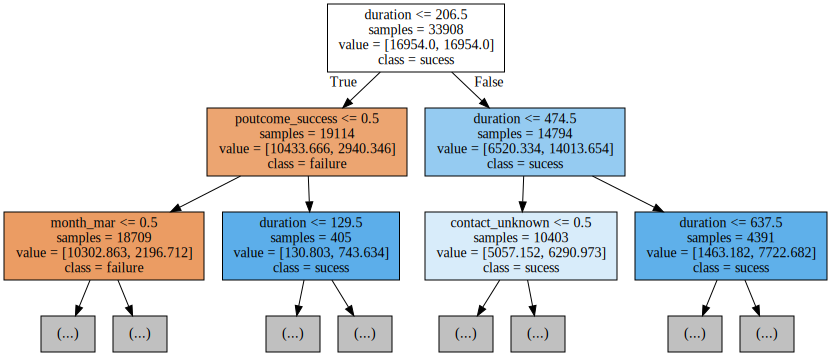

In [0]:
#Plotting the graph
export_graphviz(tree, out_file = "Decission Tree", class_names = ["failure","sucess"] , max_depth = 2, rotate = False, feature_names = X_train_processing.columns ,impurity = False, filled = True)

#Opening the graph
with open("Decission Tree") as f:
  
  dot_graph = f.read()
  graph = graphviz.Source(dot_graph)

#Showing the graph in the notebook
graph


#5.1.2 Random Forest

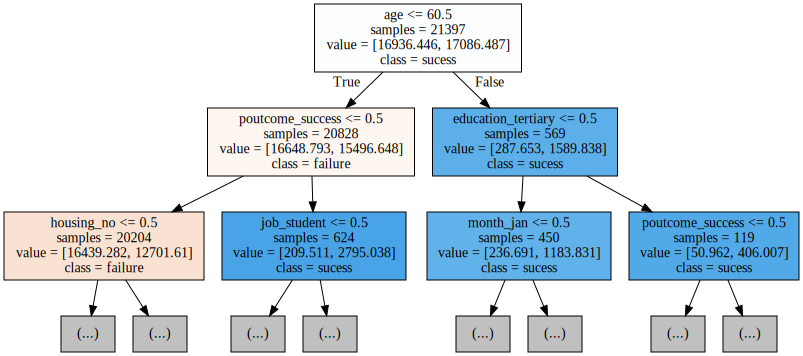

In [0]:
#Plotting the graph
export_graphviz(random_forest.estimators_[0], out_file = "Random Forest", class_names = ["failure","sucess"], max_depth = 2, rotate = False, feature_names = X_train_processing.columns, impurity = False, filled = True )

#Opening the graph
with open("Random Forest") as f:

  dot_graph = f.read()
  graph = graphviz.Source(dot_graph)

#Displaying the graph in the notebook
graph

#5.1.3 Extremely Random Forest

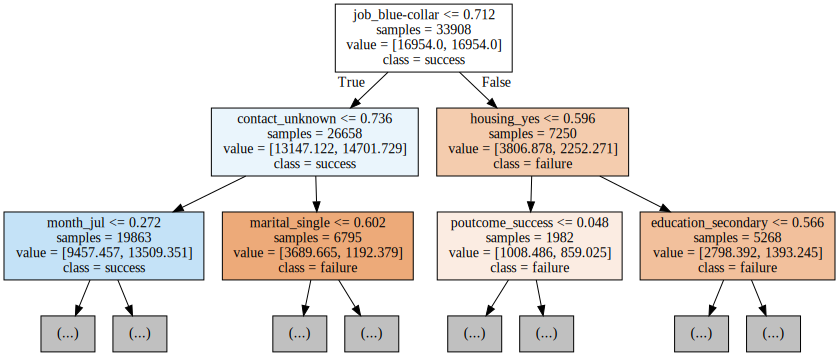

In [0]:
#Plotting the graph
export_graphviz(extremely_random_forest.estimators_[0], out_file = "Extremely Random Forest", class_names = ["failure", "success"], max_depth = 2, rotate = False, feature_names = X_train_processing.columns, impurity = False, filled = True )

#Opening the graph
with open("Extremely Random Forest") as f:

  dot_graph = f.read()
  graph = graphviz.Source(dot_graph)

#Displaying the graph in the notebook
graph

#5.1.2 Extreme Gradient Boosting

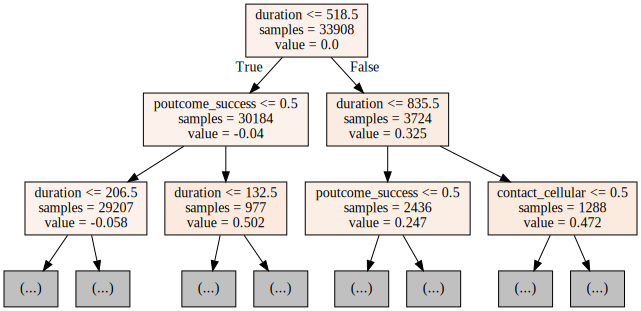

In [0]:
#Plotting the graph
export_graphviz(XGBoost.estimators_[0,0], out_file = "Extreme Gradient Boosting", class_names = ["failure", "sucess"], max_depth = 2, rotate = False, feature_names = X_train_processing.columns, impurity = False, filled = True)

#Opening the graph
with open("Extreme Gradient Boosting") as f:

  dot_graph = f.read()
  graph = graphviz.Source(dot_graph)

#Displaying the graph in the notebook
graph

#5.2 Metrics

# 5.2.1 Confusion Matrix

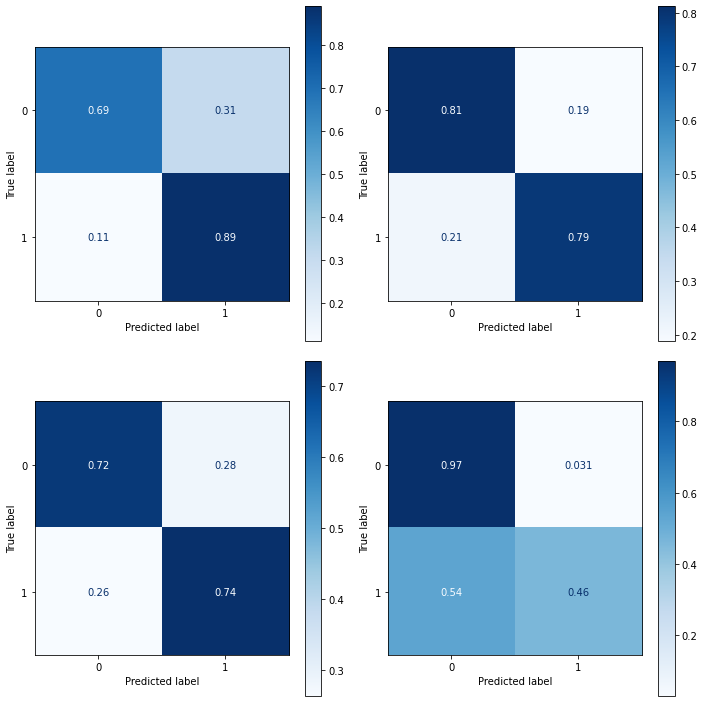

In [0]:
#Creating a figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#Plotting the confusion matrix of the 4 models
plot_confusion_matrix(tree, X_test_processing, y_test, normalize = "true", cmap = "Blues", ax = axes[0,0])
plot_confusion_matrix(random_forest, X_test_processing, y_test, normalize= "true", cmap = "Blues", ax = axes[0,1])
plot_confusion_matrix(extremely_random_forest, X_test_processing, y_test, normalize = "true", cmap= "Blues", ax = axes[1,0])
plot_confusion_matrix(XGBoost, X_test_processing, y_test, normalize = "true", cmap = "Blues", ax = axes[1,1])

#Managing the aesthetic layout
fig.tight_layout()

# 5.2.2 AUC-ROC

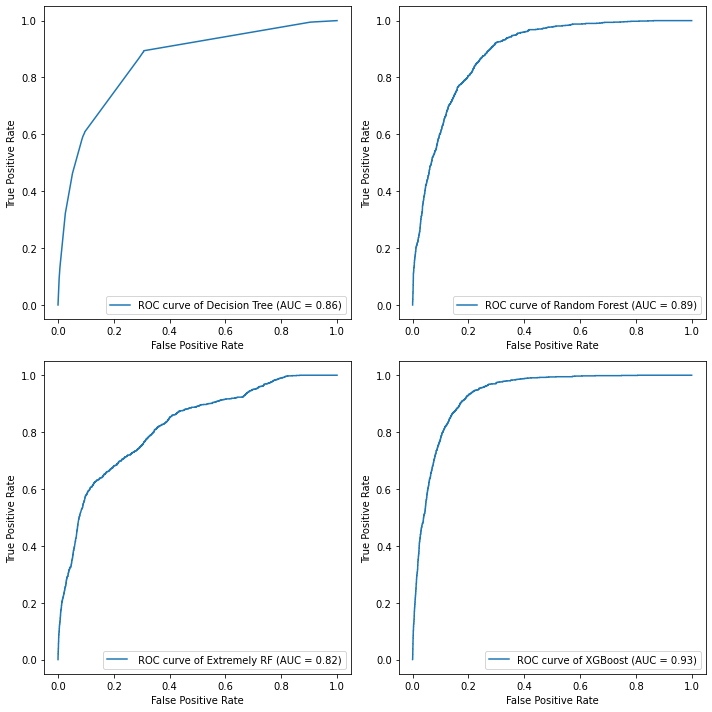

In [0]:
#Creating a figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#Plotting the ROC curve of the 4 models
plot_roc_curve(tree, X_test_processing, y_test, ax = axes[0,0], name = "ROC curve of Decision Tree")
plot_roc_curve(random_forest, X_test_processing, y_test, ax = axes[0,1], name = "ROC curve of Random Forest")
plot_roc_curve(extremely_random_forest, X_test_processing, y_test, ax = axes[1,0], name = " ROC curve of Extremely RF")
plot_roc_curve(XGBoost, X_test_processing, y_test, ax = axes[1,1], name = "ROC curve of XGBoost")

#Manaing the aesthetic layout
fig.tight_layout()

#5.2.3 Feature Importance

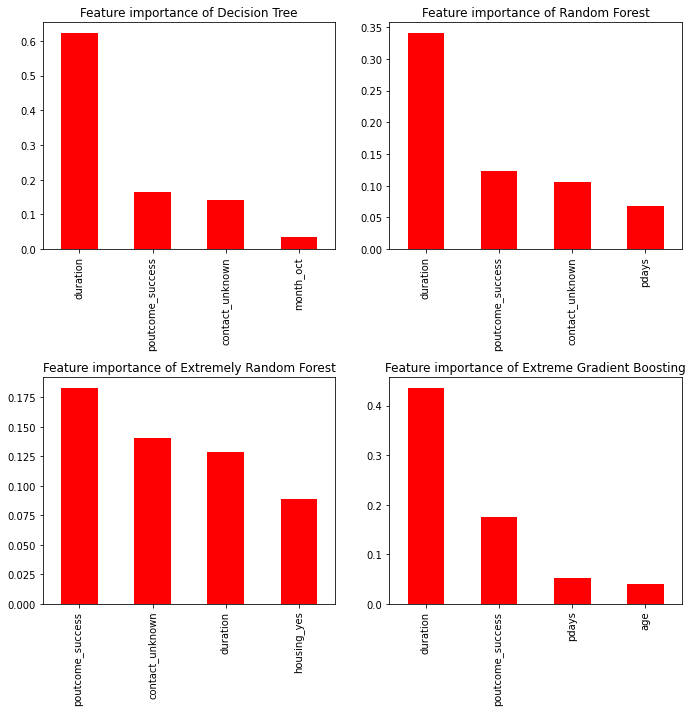

In [0]:
#Creating a figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

#Plotting the feature importance of the decision tree model
feature_importance_tree = pd.Series(data = tree.feature_importances_ , index = X_test_processing.columns)
feature_importance_tree.nlargest(4).plot(kind = "bar", color = "red", ax = axes[0,0], title = "Feature importance of Decision Tree")

#Plotting the feature importance of the random forest model
feature_importance_random_forest = pd.Series(data = random_forest.feature_importances_, index = X_test_processing.columns)
feature_importance_random_forest.nlargest(4).plot(kind = "bar", color = "red", ax = axes[0,1], title = "Feature importance of Random Forest")

#Plotting the feature importance of the extremely random forest model
feature_importance_extremely_random_forest = pd.Series(data = extremely_random_forest.feature_importances_, index = X_test_processing.columns)
feature_importance_extremely_random_forest.nlargest(4).plot(kind = "bar", color = "red", ax = axes[1,0], title = "Feature importance of Extremely Random Forest")

#Plotting the feature importance of the XGBoost model
feature_importance_XGBoost = pd.Series(data = XGBoost.feature_importances_, index = X_test_processing.columns)
feature_importance_XGBoost.nlargest(4).plot(kind = "bar", color = "red", ax = axes[1,1], title = "Feature importance of Extreme Gradient Boosting")

#Managing the aesthetic layout 
fig.tight_layout()